# Penalised Regression

## YouTube Videos
1. **Scikit Learn Linear Regression:** https://www.youtube.com/watch?v=EvnpoUTXA0E
2. **Scikit Learn Linear Penalise Regression:** https://www.youtube.com/watch?v=RhsEAyDBkTQ

## Introduction
We often do not want the coefficients/ weights to be too large. Hence we append the loss function with a penalty function to discourage large values of $w$.

\begin{align}
\mathcal{L} & = \sum_{i=1}^N (y_i-f(x_i|w,b))^2 + \alpha \sum_{j=1}^D w_j^2 + \beta \sum_{j=1}^D |w_j|
\end{align}
where, $f(x_i|w,b) = wx_i+b$. The values of $\alpha$ and $\beta$ are positive (or zero), with higher values enforcing the weights to be closer to zero.

## Lesson Structure
1. The task of this lesson is to infer the weights given the data (observations, $y$ and inputs $x$).
2. We will be using the module `sklearn.linear_model`.

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

# In order to reproduce the exact same number we need to set the seed for random number generators:
np.random.seed(1)

A normally distributed random looks as follows:

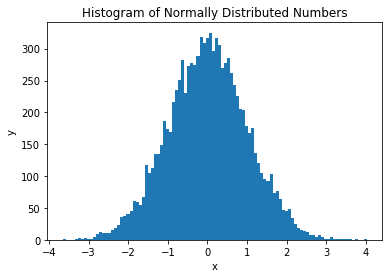

In [3]:
e = np.random.randn(10000,1)
plt.hist(e,100) #histogram with 100 bins
plt.ylabel('y')
plt.xlabel('x')
plt.title('Histogram of Normally Distributed Numbers')
plt.show()

Generate observations $y$ given feature (design) matrix $X$ according to:
$$
y = Xw + \xi\\
\xi_i \sim \mathcal{N}(0,\sigma^2)
$$

In this particular case, $w$ is a 100 dimensional vector where 90% of the numbers are zero. i.e. only 10 of the numbers are non-zero.

In [4]:
# Generate the data
N = 40 # Number of observations
D = 100 # Dimensionality

x = np.random.randn(N,D) # get random observations of x
w_true = np.zeros((D,1)) # create a weight vector of zeros
idx = np.random.choice(100,10,replace=False) # randomly choose 10 of those weights
w_true[idx] = np.random.randn(10,1) # populate then with 10 random weights

e = np.random.randn(N,1) # have a noise vector
y = np.matmul(x,w_true) + e # generate observations

# create validation set:
N_test = 50
x_test = np.random.randn(50,D)
y_test_true = np.matmul(x_test,w_true)

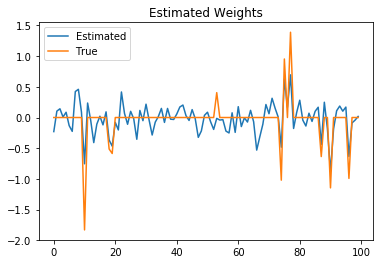

In [5]:
model = LinearRegression()
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.title('Estimated Weights')
plt.show()

One way of testing how good your model is to look at metrics. In the case of regression Mean Squared Error (MSE) is a common metric which is defined as:
$$ \frac{1}{N}\sum_{i=1}^N \xi_i^2$$ where, $\xi_i = y_i-f(x_i|w,b)$. Furthermore it is best to look at the MSE on a validation set, rather than on the training dataset that we used to train the model.

In [6]:
y_est = model.predict(x_test)
mse = np.mean(np.square(y_test_true-y_est))
print(mse)

6.79499954951


Ridge regression is where you penalise the weights by setting the $\alpha$ parameter right at the top. It penalises it so that the higher **the square of the weights** the higher the loss.

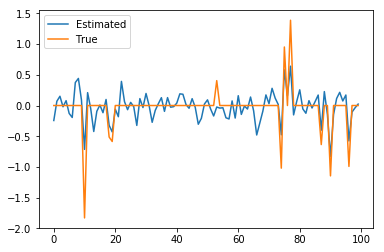

In [7]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=5.0,fit_intercept = False)
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.show()

This model is slightly better than without any penalty on the weights.

In [8]:
y_est = model.predict(x_test)
mse = np.mean(np.square(y_test_true-y_est))
print(mse)

6.42288072501


Lasso is a model that encourages weights to go to zero exactly, as opposed to Ridge regression which encourages small weights.

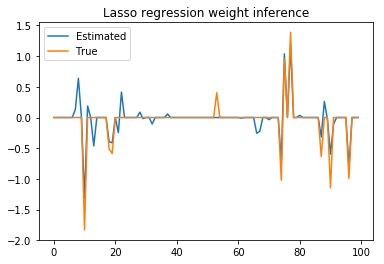

In [9]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,fit_intercept = False)
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.title('Lasso regression weight inference')
plt.show()

The MSE is significantly better than both the above models.

In [10]:
y_est = model.predict(x_test)[:,None]
mse = np.mean(np.square(y_test_true-y_est))
print(mse)

2.30600134084


Automated Relevance Determination (ARD) regression is similar to lasso in that it encourages zero weights. However, the advantage is that you do not need to set a penalisation parameter, $\alpha$, $\beta$ in this model.

/root/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


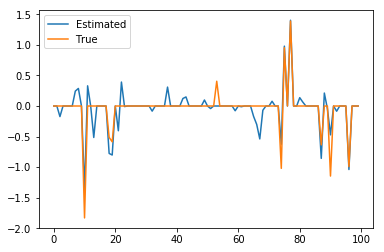

In [11]:
from sklearn.linear_model import ARDRegression

model = ARDRegression(fit_intercept = False)
model.fit(x,y)

# plot the true vs estimated coeffiecients
plt.plot(np.arange(100),np.squeeze(model.coef_))
plt.plot(np.arange(100),w_true)
plt.legend(["Estimated","True"])
plt.show()

In [12]:
y_est = model.predict(x_test)[:,None]
mse = np.mean(np.square(y_test_true-y_est))
print(mse)

2.87016741296


### Note:
Rerun the above with setting N=400

## Inverse Problems
The following section is optional and you may skip it. It is not necessary for understanding Deep Learning.

Inverse problems are where given the outputs you are required to infer the inputs. A typical example is X-rays. Given the x-ray sensor readings, the algorithm needs to build an image of an individuals bone structure.

In [9]:
import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ARDRegression
import matplotlib.pyplot as plt


def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y


def build_projection_operator(l_x, n_dir):
    """ Compute the tomography design matrix.

    Parameters
    ----------

    l_x : int
        linear size of image array

    n_dir : int
        number of angles at which projections are acquired.

    Returns
    -------
    p : sparse matrix of shape (n_dir l_x, l_x**2)
    """
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x ** 2)
    data_unravel_indices = np.hstack((data_unravel_indices,
                                      data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = np.logical_and(inds >= 0, inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator


def generate_synthetic_data():
    """ Synthetic binary data """
    rs = np.random.RandomState(0)
    n_pts = 36.
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2) ** 2 + (y - l / 2) ** 2 < (l / 2) ** 2
    mask = np.zeros((l, l))
    points = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res = np.logical_and(mask > mask.mean(), mask_outer)
    return res - ndimage.binary_erosion(res)

/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:64: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/sachin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


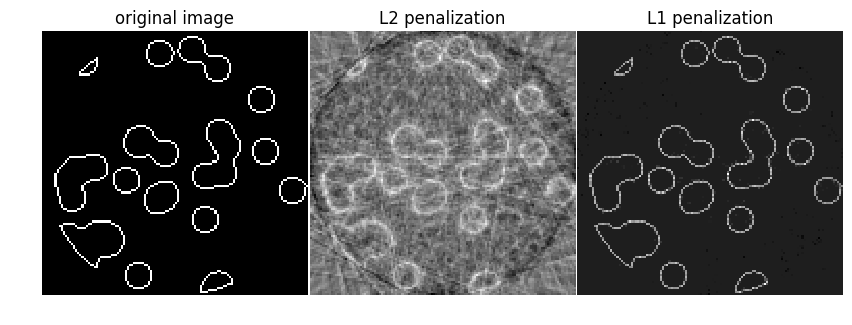

In [2]:
# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l / 7.)
data = generate_synthetic_data()
proj = proj_operator * data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)

# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)

plt.show()

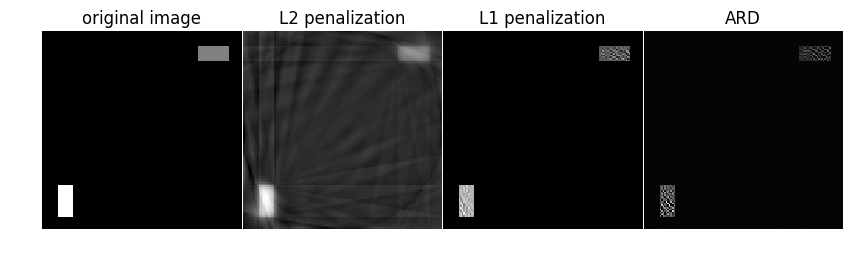

In [19]:
# New X ray like dataset
data = np.zeros((128,128))
data[10:20,100:120] = 1.5
data[100:120, 10:20] = 3.0

y = proj_operator * data.ravel()[:, np.newaxis]
y += 0.15 * np.random.randn(*y.shape)

# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, y.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

# model = ARDRegression(n_iter=20)
# model.fit(proj_operator, proj.ravel())
# ard = model.coef_.reshape(l, l)

plt.figure(figsize=(8, 3.3))
plt.subplot(141)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')
plt.subplot(142)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')
plt.subplot(143)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')
# plt.subplot(144)
# plt.imshow(ard, cmap=plt.cm.gray, interpolation='nearest')
# plt.title('ARD')
# plt.axis('off')

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)

plt.show()

In [60]:
data.shape

(128, 128)

In [61]:
proj_operator

<2304x16384 sparse matrix of type '<class 'numpy.float64'>'
	with 555378 stored elements in COOrdinate format>

In [62]:
128*128

16384

In [63]:
y = proj_operator * data.ravel()[:, np.newaxis]

In [64]:
y.shape

(2304, 1)